In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 11})

from functions.make_df_without_gaps import make_df_without_gaps
import warnings 
warnings.simplefilter('ignore')
import pickle

with open('../name_wells_pickle/dict_name_well.pickle', 'rb') as f:
    dict_name_well = pickle.load(f)
with open('../name_wells_pickle/dict_name_well_oil_more_365.pickle', 'rb') as f:
    dict_name_oil_well_year = pickle.load(f)

%config InlineBackend.figure_formats = 'svg'

from functions.make_df_with_count_days_ago import make_df_with_count_days_ago
from functions.uppend_p_zab import uppend_p_zab
from functions.uppend_inj_wells import uppend_inj_wells

from functions.unboxcox import unboxcox
from functions.tsplot import tsplot

In [2]:
train = pd.read_csv('../../data/basic_data/train_data.csv')
train['WELL_NAME'] = train['WELL_NAME'].map(dict_name_well)
train.drop(columns=['KCHARWORK', 'MEASURED_IN', 'IS_WORKING'], inplace=True)
train['MEASURED_IN_DATE'] = pd.to_datetime(train['MEASURED_IN_DATE'])

coord_well = pd.read_csv('../../data/basic_data/coords.csv')
coord_well['WELL_NAME'] = coord_well['WELL_NAME'].map(dict_name_well)
coord_well.dropna(inplace=True)
coord_well = coord_well.set_index('WELL_NAME')
coord_well.sort_index(inplace=True);


train_oil_year_accum = pd.read_csv('../../data/preprocessed_data/train_oil_year_accum.csv')
train_oil_year_accum['MEASURED_IN_DATE'] = pd.to_datetime(train_oil_year_accum['MEASURED_IN_DATE'])

In [3]:
graph_wells = pd.DataFrame(index=range(266))
for well in range(266):
    graph_wells[well] = np.sqrt(np.square(coord_well['COORD_X'] - coord_well[coord_well.index == well]['COORD_X'].values) +
                        np.square(coord_well['COORD_Y'] - coord_well[coord_well.index == well]['COORD_Y'].values))
graph_wells

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.000000,5550.282189,1208.834563,7466.414534,2316.878288,1197.448120,2112.274603,1706.095479,1879.414649,4742.804655,...,4751.633818,3902.751253,1703.789632,1836.696196,1650.054443,2666.949595,7000.858697,4118.238649,7388.558098,7740.414535
1,5550.282189,0.000000,6215.509514,12069.082204,7866.817142,6741.650306,7635.158454,6554.488347,7273.234877,10121.601743,...,829.080852,1788.555145,5775.980221,5916.349271,4472.687248,6694.739180,7255.699064,6868.956089,9719.150350,9519.010449
2,1208.834563,6215.509514,0.000000,6321.573934,2017.786906,1116.962399,2095.214786,497.772202,1117.914273,3906.176775,...,5470.104568,4728.386126,879.996245,2942.017191,1792.375581,1530.075606,6270.660809,3117.241943,6283.835818,6701.673134
3,7466.414534,12069.082204,6321.573934,0.000000,5995.745575,6566.353630,6502.122269,5848.268857,5700.068596,3645.387497,...,11447.148605,10870.636613,6414.923193,8805.689219,7732.730321,5393.659576,7884.938204,5492.007312,4977.398349,5894.226812
4,2316.878288,7866.817142,2017.786906,5995.745575,0.000000,1129.559649,506.557993,2068.559954,1035.284290,2681.284207,...,7068.105652,6207.498601,2872.923750,2927.751109,3691.727659,3058.434436,8068.295918,4709.569222,7448.348587,8036.912300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2666.949595,6694.739180,1530.075606,5393.659576,3058.434436,2525.443316,3325.231418,1124.461861,2028.705494,3909.063369,...,6054.852165,5491.975310,1103.793531,4462.378418,2361.695532,0.000000,5014.708982,1666.872592,4753.812242,5185.524384
262,7000.858697,7255.699064,6270.660809,7884.938204,8068.295918,7384.430380,8297.323963,6038.820084,7033.959670,8418.622345,...,7144.936223,7279.170404,5423.616473,8764.867660,5583.159517,5014.708982,0.000000,3420.000761,3357.410401,2709.276767
263,4118.238649,6868.956089,3117.241943,5492.007312,4709.569222,4174.317558,4991.394844,2773.973523,3688.100107,5090.510211,...,6382.391423,6048.139485,2414.494156,5954.448298,3223.209031,1666.872592,3420.000761,0.000000,3340.444385,3622.757215
264,7388.558098,9719.150350,6283.835818,4977.398349,7448.348587,7220.132193,7842.414172,5854.298413,6541.552184,6699.068826,...,9377.966279,9201.865824,5703.162238,9208.458661,6554.294815,4753.812242,3357.410401,3340.444385,0.000000,916.869575


full_well = []
for well in train_oil_year_accum_without_gaps['WELL_NAME'].unique():
    
    data = train_oil_year_accum_without_gaps[train_oil_year_accum_without_gaps['WELL_NAME'] == well]
    data.set_index('MEASURED_IN_DATE', inplace=True)
    
    daily_counts = data.resample('D').count()
    if daily_counts.isnull().values.any():
        full_well.append(well)
print(f'Cкважин с не пропущенными значениями = {len(full_well)}')

In [4]:
df = make_df_without_gaps(train_oil_year_accum, date_column='MEASURED_IN_DATE', group_params='WELL_NAME')
df = make_df_with_count_days_ago(dataframe=df, count_days=50, target='OIL_RATE')
df = uppend_p_zab(preproc_df=df, train_df=train_oil_year_accum)
df = uppend_inj_wells(preproc_df=df, train_df=train, distance=True, graph_wells=graph_wells)

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import scipy.stats as scs

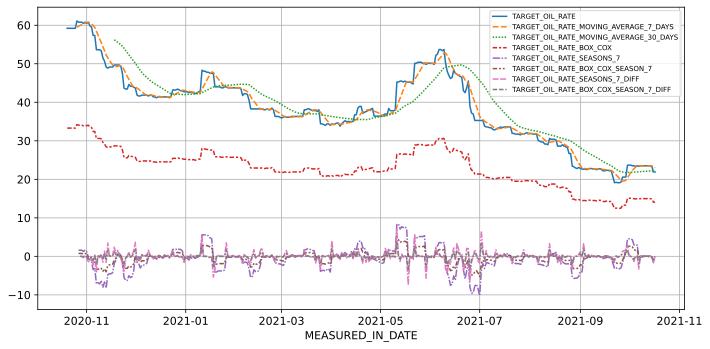

In [44]:

data = df[df['WELL_NAME'] == 1][['TARGET_OIL_RATE']]

data['TARGET_OIL_RATE_MOVING_AVERAGE_7_DAYS'] = data['TARGET_OIL_RATE'].rolling(window=7).mean()
data['TARGET_OIL_RATE_MOVING_AVERAGE_30_DAYS'] = data['TARGET_OIL_RATE'].rolling(window=30).mean()

'''
data['TARGET_OIL_RATE_EXPON_SMOOTHING'] = exponetial_smoothing(data=data['TARGET_OIL_RATE'], 
                                                               alpha=0.05)
data['TARGET_OIL_RATE_DOUBLE_EXPON_SMOOTHING'] = double_exponential_smoothing(data=data["TARGET_OIL_RATE"], 
                                                                              alpha=0.1, 
                                                                              beta=0.5)
model = Holt_Winters(data=data['TARGET_OIL_RATE'],
                     slen=30,
                     alpha=0.9,
                     beta=0.6,
                     gamma=0.6,
                     n_preds=0, 
                     scaling_factor=1.98)
model.triple_exponential_smoothing()

data['TARGET_OIL_RATE_TRIPLE_EXPON_SMOOTHING'] = model.result
'''


data['TARGET_OIL_RATE_BOX_COX'], lmbda = scs.boxcox(data['TARGET_OIL_RATE'])



data['TARGET_OIL_RATE_SEASONS_7'] = data['TARGET_OIL_RATE'] - data['TARGET_OIL_RATE'].shift(7)
data['TARGET_OIL_RATE_BOX_COX_SEASON_7'] = data['TARGET_OIL_RATE_BOX_COX'] - data['TARGET_OIL_RATE_BOX_COX'].shift(7)

#data['TARGET_OIL_RATE_SEASONS_30'] = data['TARGET_OIL_RATE'] - data['TARGET_OIL_RATE'].shift(30)
#data['TARGET_OIL_RATE_BOX_COX_SEASON_30'] = data['TARGET_OIL_RATE_BOX_COX'] - data['TARGET_OIL_RATE_BOX_COX'].shift(30)

data['TARGET_OIL_RATE_SEASONS_7_DIFF'] = data['TARGET_OIL_RATE_SEASONS_7'] - data['TARGET_OIL_RATE_SEASONS_7'].shift(1)
data['TARGET_OIL_RATE_BOX_COX_SEASON_7_DIFF'] = (data['TARGET_OIL_RATE_BOX_COX_SEASON_7'] 
                                        - data['TARGET_OIL_RATE_BOX_COX_SEASON_7'].shift(1))

plt.figure(figsize=(10, 5));
plt.grid(True)
sns.lineplot(data);
plt.legend(fontsize=7);
plt.tight_layout()

In [73]:

columns

['WATER_CUT',
 'LIQ_RATE',
 'OIL_RATE',
 'WATER_RATE',
 'Q_LIQ_ACCUM',
 'Q_OIL_ACCUM',
 'Q_WATER_ACCUM']

In [89]:
train_number_columns[train_number_columns['WELL_NAME'] == 46]['WATER_CUT'].describe()

count    1742.000000
mean       51.876292
std        37.884935
min         0.000000
25%         9.000000
50%        77.000000
75%        87.000000
max        95.000000
Name: WATER_CUT, dtype: float64


oil_wells = train_oil_year_accum['WELL_NAME'].unique()
train_number_columns = train_oil_year_accum.select_dtypes(include='number').dropna(axis=1)
train_number_columns.drop(columns=['INTAKE'], inplace=True)

def adf_pvalue(x):
    return sm.tsa.stattools.adfuller(x)[1]

df_pvalue = pd.DataFrame(columns=columns,
                         index=oil_wells)
df_pvalue.index.name = 'WELL_NAME'

columns = list(train_number_columns.columns)
columns.remove('WELL_NAME')

for column in columns:
    
    for well in oil_wells:
       
        data_well = train_number_columns[train_number_columns['WELL_NAME'] == well][column]
        data_well = data_well + 0.0000000000001
        data_well, lmbda_well = scs.boxcox(data_well)
        data_well = pd.Series(data_well)
        
        data_well = data_well - data_well.shift(7)
        data_well = data_well - data_well.shift(1)
        data_well.dropna(inplace=True)
        
        df_pvalue.loc[well, column] = float(sm.tsa.adfuller(data_well)[1])
    
df_pvalue = df_pvalue.dropna(axis=0)
df_pvalue = df_pvalue.astype('float64')



In [140]:
df_pvalue.to_csv('../../data/preprocessed_data/pvalue_boxcox_shift_7_and_1_train_data_oil_accum.csv')

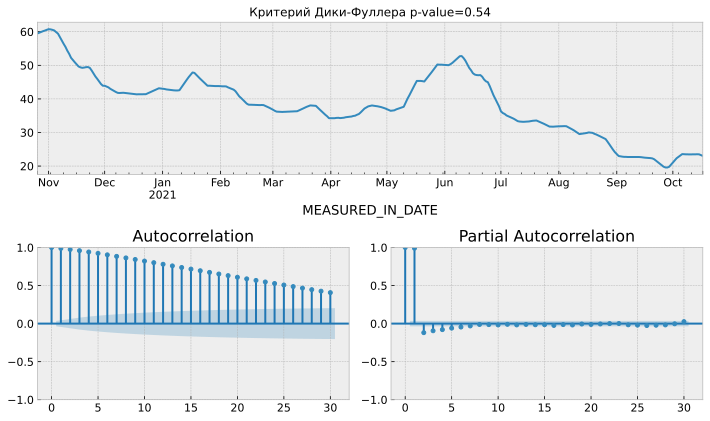

In [34]:
tsplot(data['TARGET_OIL_RATE_MOVING_AVERAGE_7_DAYS'].dropna(), lags=30)

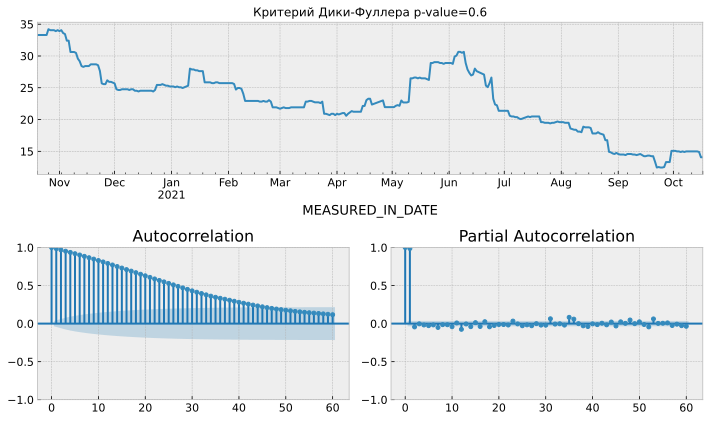

In [35]:
tsplot(data['TARGET_OIL_RATE_BOX_COX'], lags=60)

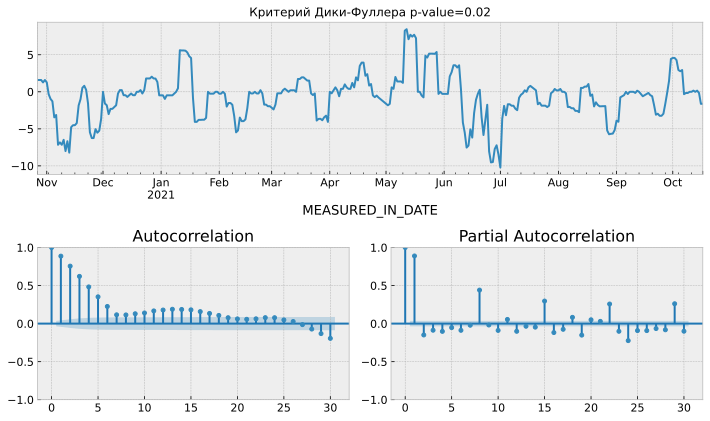

In [37]:
tsplot(data['TARGET_OIL_RATE_SEASONS_7'].dropna(), lags=30)

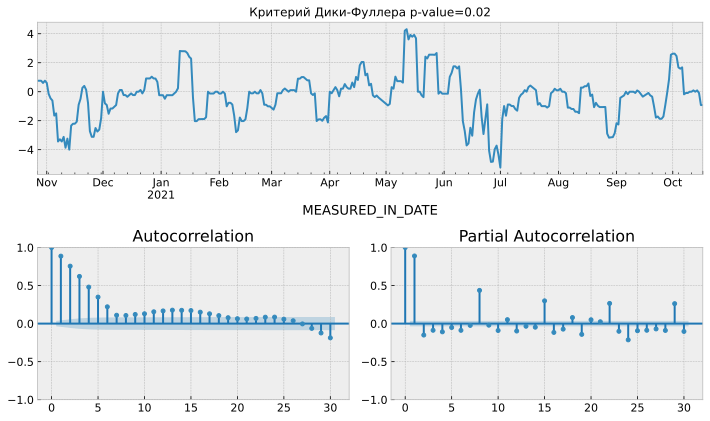

In [38]:
tsplot(data['TARGET_OIL_RATE_BOX_COX_SEASON_7'].dropna(), lags=30)

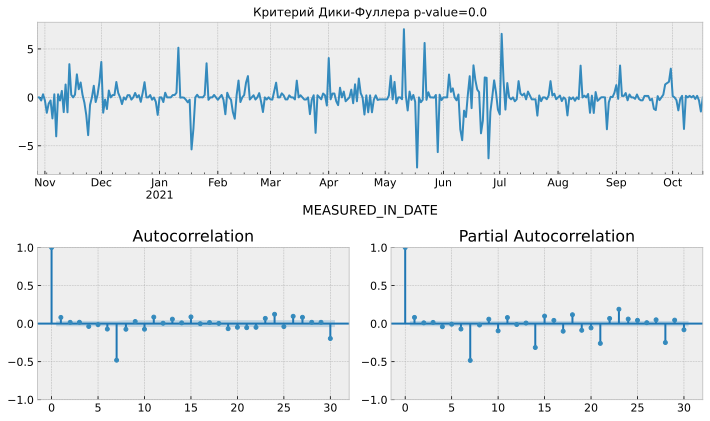

In [39]:
tsplot(data['TARGET_OIL_RATE_SEASONS_7_DIFF'].dropna(), lags=30)

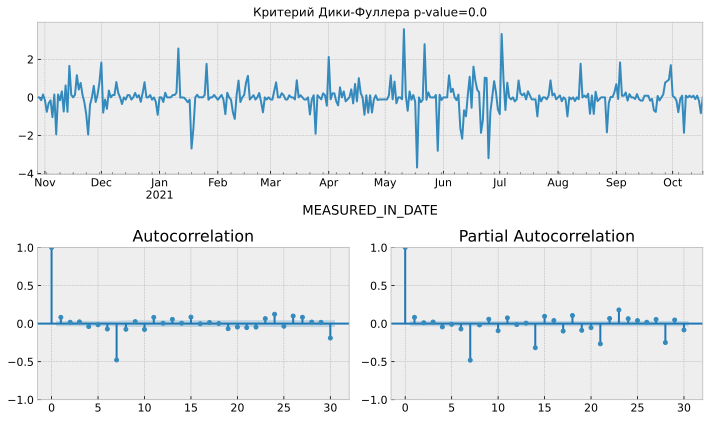

In [41]:
tsplot(data['TARGET_OIL_RATE_BOX_COX_SEASON_7_DIFF'].dropna(), lags=30)

In [ ]:
#data['TARGET_OIL_RATE_BOX_COX_SEASON_7_DIFF'].to_csv('../../data/preprocessed_data/test_')